This file can show the results of the LHS results. However, I think a file created using (4) is maybe better

In [2]:
import pandas as pd

# Define the folder path and file names
folder_name = "results"
date = "2025-06-03_07-49"  # Replace with the exact date if needed

# Load the experiments DataFrame
experiments = pd.read_csv(f"{folder_name}/experiments_{date}.csv")

# Load the outcomes DataFrame
outcomes = pd.read_csv(f"{folder_name}/outcomes_{date}.csv")

print("DataFrames recreated from stored CSV files.")

DataFrames recreated from stored CSV files.


DataFrames recreated from stored CSV files.


In [5]:
# only works because we have scalar outcomes
df=pd.DataFrame(outcomes)
df = df.groupby(outcomes.index // 3).sum()
df['Total Deaths']=df['A.1_Expected Number of Deaths']+df['A.2_Expected Number of Deaths']+df['A.3_Expected Number of Deaths']+df['A.4_Expected Number of Deaths']+df['A.5_Expected Number of Deaths']


KeyError: 'A.1_Expected Number of Deaths'

KeyError: 'RfR Total Costs'

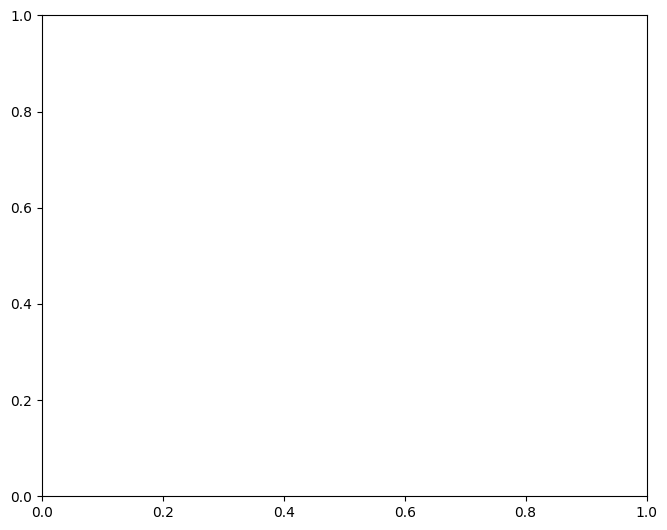

In [6]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Create a figure with a custom layout
fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 2, width_ratios=[4, 1], height_ratios=[1, 4], hspace=0.05, wspace=0.05)

# Scatter plot
ax_scatter = fig.add_subplot(gs[1, 0])
ax_scatter.scatter(df['RfR Total Costs'], df['Total Deaths'], c='blue', alpha=0.01)
ax_scatter.set_xlabel('RfR Total Costs')
ax_scatter.set_ylabel('Total Deaths')
ax_scatter.grid(True)

# Histogram for RfR Total Costs
ax_hist_x = fig.add_subplot(gs[0, 0], sharex=ax_scatter)
ax_hist_x.hist(df['RfR Total Costs'], bins=10, color='gray', alpha=0.7)
ax_hist_x.axis('off')  # Hide axis labels for better aesthetics

# Histogram for Total Deaths
ax_hist_y = fig.add_subplot(gs[1, 1], sharey=ax_scatter)
ax_hist_y.hist(df['Total Deaths'], bins=30, orientation='horizontal', color='gray', alpha=0.7)
ax_hist_y.axis('off')  # Hide axis labels for better aesthetics

plt.show()

In [ ]:
x = experiments
x_uncertainties = x.iloc[:, 0:19]
# This stops an error, but not sure whether it is a good idea.
x_uncertainties = x_uncertainties.astype(float)
x_levers = x.iloc[:, 19:-3]

# y = numeric outcome values
threshold_value = 0.01
best_cases = df['Total Deaths']<threshold_value

In [3]:
x_uncertainties

NameError: name 'x_uncertainties' is not defined

In the following Prim_alg, you can change x to x_uncertainties or x_levers. So that you can see which have the biggest effects. 

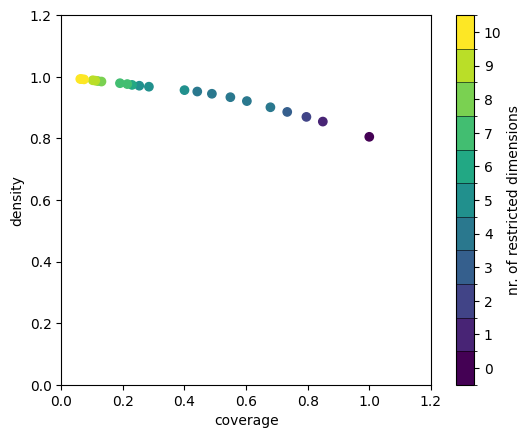

In [7]:
from ema_workbench.analysis import prim
import matplotlib.pyplot as plt
from ema_workbench.analysis import pairs_plotting


# initialize PRIM
prim_alg = prim.Prim(x_levers, best_cases, threshold=0.8, peel_alpha=0.1)

# search for box
box= prim_alg.find_box()

# show trade-offs between coverage and density
box.show_tradeoff()
plt.show()


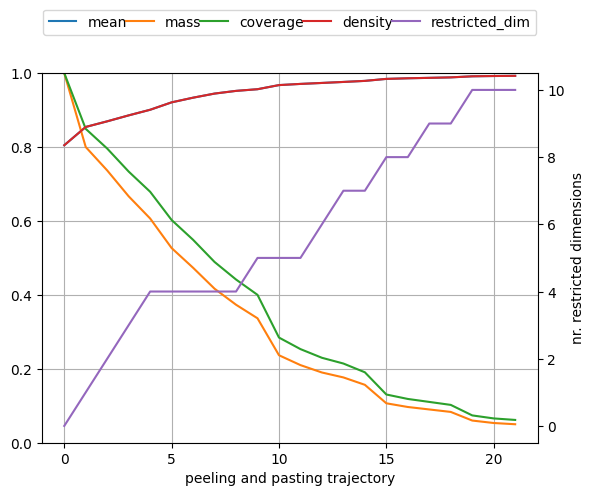

In [8]:
box.show_ppt()
plt.show()


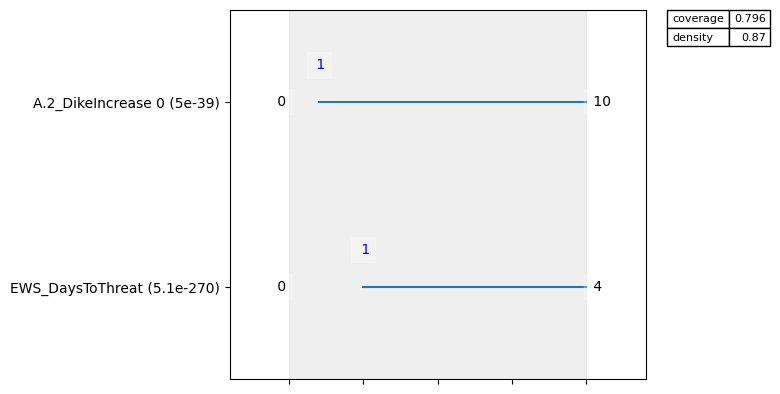

In [9]:
point = 2
box.inspect(point, style='graph')
plt.show()

Same here change x to x_levers or x_uncertainties

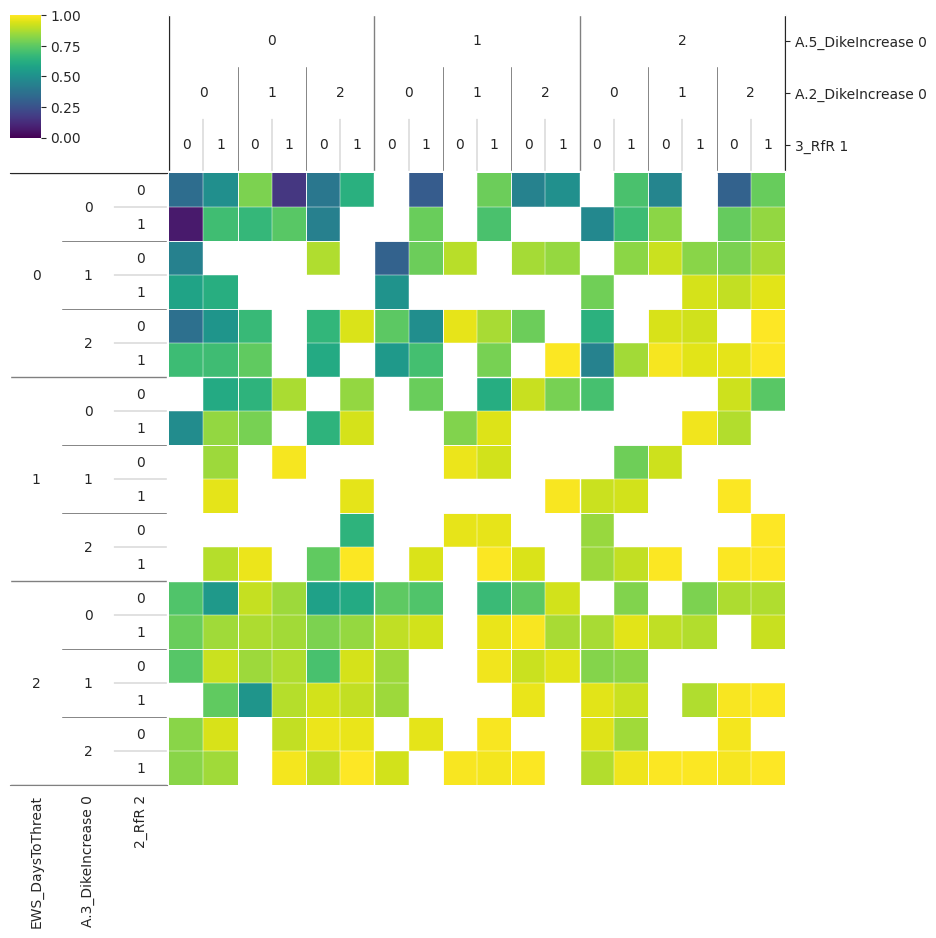

In [41]:
from ema_workbench.analysis import dimensional_stacking
best_cases_array=best_cases.to_numpy()
dimensional_stacking.create_pivot_plot(x_levers, best_cases_array)
plt.show()

